# Aniakchak volcanic glass absolute paleointensity data and geochemistry compilation

This jupyter notebook is for compiling absolute paleointensity data through IZZI paleointensity experiment coupled with "CCRIT" selection criteria 

The data analyses include:
- plot experimental results in context of model reconstructions in an attempt to compare geomagnetic field structure in different regions in Pacific during the given time period. The consistencies or discrepancies between models and data will be explored and we will provide our thoughts on the differences. 
- use previously published geochemistry data archived by USGS to aid in our sample's geologic unit classification and ultimately age constraints. 


Cromwell, G., Zhang, Y. (2021), New paleointensity data from Aniakchak volcano, Alaska, USA, accepted by Geochemistry, Geophysics, Geosystems.

## importing necessary python packages and notebook format

In [1]:
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
from matplotlib.transforms import offset_copy

from pyrolite.util.classification import TAS
from collections import OrderedDict
# from pyrolite.util.synthetic import test_df, random_cov_matrix

In [2]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt

lakes_10m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

#Alaska_outline = ShapelyFeature(Reader('../Data/Alaska_state_boundary/tl_2016_02_cousub.shp').geometries(),
#                                 ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')
Alaska_outline = ShapelyFeature(Reader('../Data/Alaska_state_boundary/tl_2016_02_cousub.shp').geometries(),
                                 ccrs.PlateCarree(), facecolor = 'none', edgecolor='gray')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Making general map of Aniakchak in context of Alaska and Anchorage

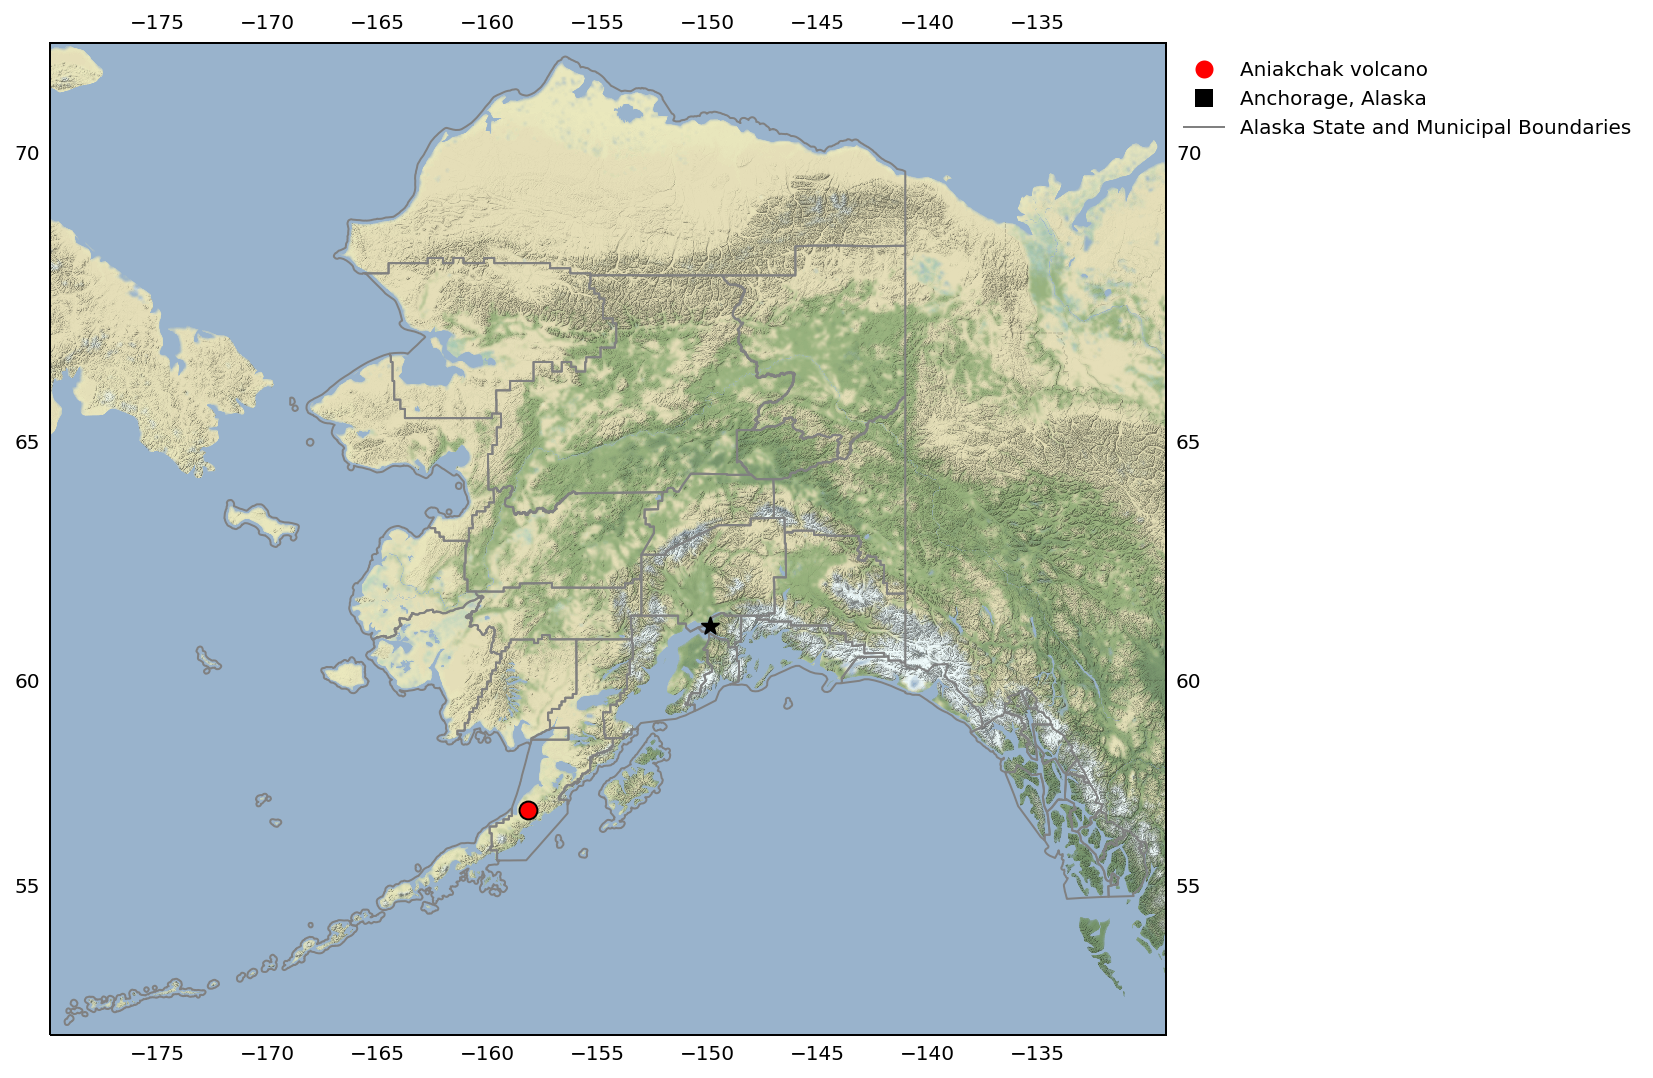

In [4]:
central_lat = 56.9
central_lon = -158.15
extent = [central_lon-21.75, central_lon+29, central_lat-6, central_lat+13]
terrain = img_tiles.Stamen('terrain-background')

plt.figure(1,figsize = (10,10))
# ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude= central_lon, central_latitude= central_lat))
ax = plt.subplot(1,1,1, projection=terrain.crs)
# ax.add_image(terrain, 5)
# ax.add_feature(Alaska_outline)
ax.add_image(terrain, 5)
ax.add_feature(Alaska_outline)
ax.set_extent(extent, crs=ccrs.Geodetic())

ax.scatter(-158.15, 56.9, 80, transform=ccrs.Geodetic(), zorder=100, color = 'red', edgecolor = 'black', marker = 'o', label = 'Aniakchak Volcano')
ax.scatter(-149.90, 61.2, 80, transform=ccrs.Geodetic(), zorder=100, color = 'black', edgecolor = 'black', marker = '*', label = 'Anchorage, Alaska')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = [-175,-170, -165,-160, -155,-150, -145,-140, -135], ylocs = [50, 55, 60, 65, 70],
             color='gray', alpha=0, linestyle='--')
legend_elements = [Line2D([], [], marker='o', c = 'w', markerfacecolor = 'red', linewidth = 0.2, label='Aniakchak volcano', markersize=10),
                   Line2D([0], [0], marker='s', c = 'w', markerfacecolor = 'black', linewidth = 0.2, label='Anchorage, Alaska', markersize=10),
                   Line2D([0], [0], ls = '-', c = 'gray', color='gray', markerfacecolor = 'gray', label='Alaska State and Municipal Boundaries', markersize=80)]
ax.legend(handles=legend_elements)
# ax.set_xlabel('Years Before Present')
# plt.savefig('Alaskamap_terrain.pdf')
plt.show()

## Extract local field intensity estimates from different models at Anikchak location

In [5]:
!igrf.py -ages -1550 2019 10 -loc 56.9 -158.15 -mod pfm9k >pfm9k.igrf
pfm9k=pd.read_csv('pfm9k.igrf',delim_whitespace=True,header=None)
# pfm9k.drop(pfm9k.tail(1).index,inplace=True)
pfm9k.columns=['dec','inc','int','year','el','lat','lon']
pfm9k['int_uT']=np.array(pfm9k['int'])*1e-3 # convert from nT to uT
pfm9k['ages_BP']=1950-np.array(pfm9k.year)
pfm9k['vadm']=pmag.b_vdm(np.array(pfm9k['int_uT'])*1e-6,56.9)
                         
!igrf.py -ages -1550 2019 10 -loc 56.9 -158.15 -mod cals10k.2 >cals10k.igrf
cals10k=pd.read_csv('cals10k.igrf',delim_whitespace=True,header=None)
cals10k.columns=['dec','inc','int','year','el','lat','lon']
cals10k['int_uT']=np.array(cals10k['int'])*1e-3 # convert from nT to uT
cals10k['ages_BP']=1950-np.array(cals10k.year)
cals10k['vadm']=pmag.b_vdm(np.array(cals10k['int_uT'])*1e-6,56.9)

!igrf.py -ages -1550 2019 10 -loc 56.9 -158.15 -mod hfm10k >hfm10k.igrf
hfm10k=pd.read_csv('hfm10k.igrf',delim_whitespace=True,header=None,skiprows=2)
hfm10k.columns=['dec','inc','int','year','el','lat','lon']
hfm10k['int_uT']=np.array(hfm10k['int'])*1e-3 # convert from nT to uT
hfm10k['ages_BP']=1950-np.array(hfm10k.year)
hfm10k['vadm']=pmag.b_vdm(np.array(hfm10k['int_uT'])*1e-6,56.9)

In [6]:
!igrf.py -ages -1000 2019 10 -loc 56.9 -158.15 -mod cals3k >cals3k.igrf
cals3k=pd.read_csv('cals3k.igrf',delim_whitespace=True,header=None)
cals3k.columns=['dec','inc','int','year','el','lat','lon']
cals3k['int_uT']=np.array(cals3k['int'])*1e-3 # convert from nT to uT
cals3k['ages_BP']=1950-np.array(cals3k.year)
cals3k['vadm']=pmag.b_vdm(np.array(cals3k['int_uT'])*1e-6,56.9)

In [7]:
!igrf.py -ages -1000 2019 10 -loc 56.9 -158.15 -mod arch3k >arch3k.igrf
arch3k=pd.read_csv('arch3k.igrf',delim_whitespace=True,header=None)
arch3k.columns=['dec','inc','int','year','el','lat','lon']
arch3k['int_uT']=np.array(arch3k['int'])*1e-3 # convert from nT to uT
arch3k['ages_BP']=1950-np.array(arch3k.year)
arch3k['vadm']=pmag.b_vdm(np.array(arch3k['int_uT'])*1e-6,56.9)

In [8]:
pfm9k_1b=pd.read_csv('pfm9k.1b_aniakchak_Bf.csv',sep=r"\,",header=None)
pfm9k_1b.columns=['year','F','F_high','F_low']
#pfm9k_1b['int_ut_high']=np.array(pfm9k_1b['int_ut']+pfm9k_1b['deltaF'])
#pfm9k_1b['int_ut_low']=np.array(pfm9k_1b['int_ut']-pfm9k_1b['deltaF'])
pfm9k_1b['ages_BP']=1950-pfm9k_1b.year

## Plot site results (microT)

Index(['er_site_name', 'Latitude', 'Longitude', 'Unit', 'Avg_age',
       'Avg_age_pm', 'Age_high', 'Age_low', 'Age_notes',
       'Pyroclastic_lava_uncertain', 'Location', 'Description', 'Reference',
       'site_int_n', 'site_int_uT', 'site_int_sigma_uT', 'site_VADM',
       'site_VADM_sigma', 'site_int_sigma_perc', 'site_int_min_uT',
       'site_int_min_sigma_uT', 'site_int_max_uT', 'site_int_max_sigma_uT',
       'site_int_interval_uT', 'site_int_interval_perc', 'Warning'],
      dtype='object')
['NA02-1B' 'NA92-28C' 'NA97-24' 'NA94-2' 'NA94-5' 'NA92-42D']
['NA02-1B' 'NA92-28C' 'NA97-24' 'NA94-2' 'NA94-5' 'NA92-42D']


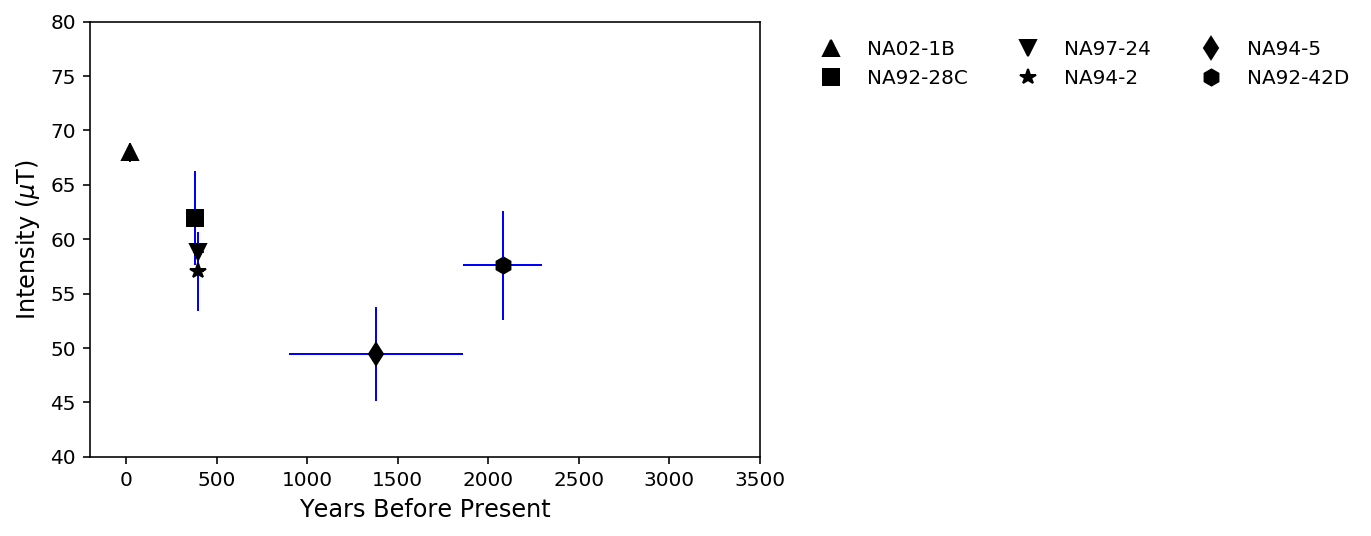

In [9]:
#pulling CCRIT site results from Aniackchak sites file
all_data=pd.read_csv('../Data/PINT/thellier_interpreter_site_revision.txt',sep='\t',header=0)
print (all_data.columns)
print (all_data['er_site_name'].unique())
#print (len(all_data))

avg_lat=56.89231667 #NOT including site without a location. Avg of six sites, from excel

nmsite=all_data['er_site_name'].unique()
print (nmsite)
#symsite=['r^','rs','rv','r*','ro','rd','rh'] #red symbols
symsite=['k^','ks','kv','k*','kd','kh'] #black symbols

#print (nmsite)


sym=0
for ref in nmsite:
    sitedat=all_data[all_data['er_site_name'].str.contains(ref)==True]
    plt.plot(sitedat['Avg_age'],sitedat['site_int_uT'],symsite[sym],label=ref,markersize=8)
    plt.errorbar(sitedat['Avg_age'],sitedat['site_int_uT'],yerr=sitedat['site_int_sigma_uT'],xerr=sitedat['Avg_age_pm'],ecolor='b',label='_nolegend_')
    sym+=1


plt.axis([-200,3500,40,80])
plt.xlabel('Years Before Present')
plt.ylabel('Intensity ($\mu$T)')
plt.legend(numpoints=1,bbox_to_anchor=(1.05, 1),loc=2,ncol=3)
plt.show()

['NA02-1B' 'NA92-28C' 'NA97-24' 'NA94-2' 'NA94-5' 'NA92-42D']


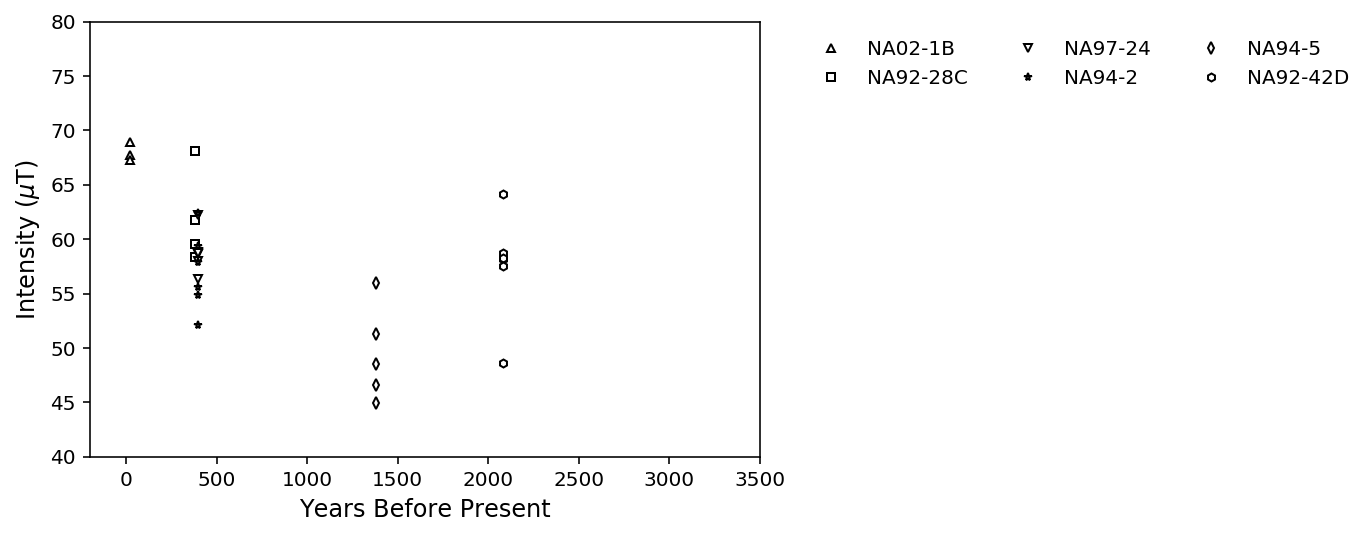

In [10]:
#pulling CCRIT specimen results from Aniackchak specimens file
all_data2=pd.read_csv('thellier_interpreter_specimens_revision.txt',sep='\t',header=0)

nmsample=all_data2['er_sample_name'].unique()

print (nmsample)
#symsample=['r^','ws','cv','g*','bo','md','yh']
symsample=['w^','ws','wv','w*','wd','wh']

nmspec=all_data2['er_specimen_name'].unique()

#print (nmspec)

site1_dat=all_data2[all_data2['er_sample_name'].str.contains('NA02-1B')==True]
site2_dat=all_data2[all_data2['er_sample_name'].str.contains('NA92-28C')==True]
site3_dat=all_data2[all_data2['er_sample_name'].str.contains('NA97-24')==True]
site4_dat=all_data2[all_data2['er_sample_name'].str.contains('NA94-2')==True]
#site5_dat=all_data2[all_data2['er_sample_name'].str.contains('NA94-3')==True]
site6_dat=all_data2[all_data2['er_sample_name'].str.contains('NA94-5')==True]
site7_dat=all_data2[all_data2['er_sample_name'].str.contains('NA92-42D')==True]


plt.plot(site1_dat['Avg_age'],site1_dat['specimen_int_uT'],symsample[0],label='NA02-1B',markeredgecolor='k')
plt.plot(site2_dat['Avg_age'],site2_dat['specimen_int_uT'],symsample[1],label='NA92-28C',markeredgecolor='k')
plt.plot(site3_dat['Avg_age'],site3_dat['specimen_int_uT'],symsample[2],label='NA97-24',markeredgecolor='k')
plt.plot(site4_dat['Avg_age'],site4_dat['specimen_int_uT'],symsample[3],label='NA94-2',markeredgecolor='k')
#plt.plot(site5_dat['Avg_age'],site5_dat['specimen_int_uT'],symsample[4],label='NA94-3',markeredgecolor='k')
plt.plot(site6_dat['Avg_age'],site6_dat['specimen_int_uT'],symsample[4],label='NA94-5',markeredgecolor='k')
plt.plot(site7_dat['Avg_age'],site7_dat['specimen_int_uT'],symsample[5],label='NA92-42D',markeredgecolor='k')



plt.axis([-200,3500,40,80])
plt.xlabel('Years Before Present')
plt.ylabel('Intensity ($\mu$T)')
plt.legend(numpoints=1,bbox_to_anchor=(1.05, 1),loc=2,ncol=3)
plt.show()

## plot all three together

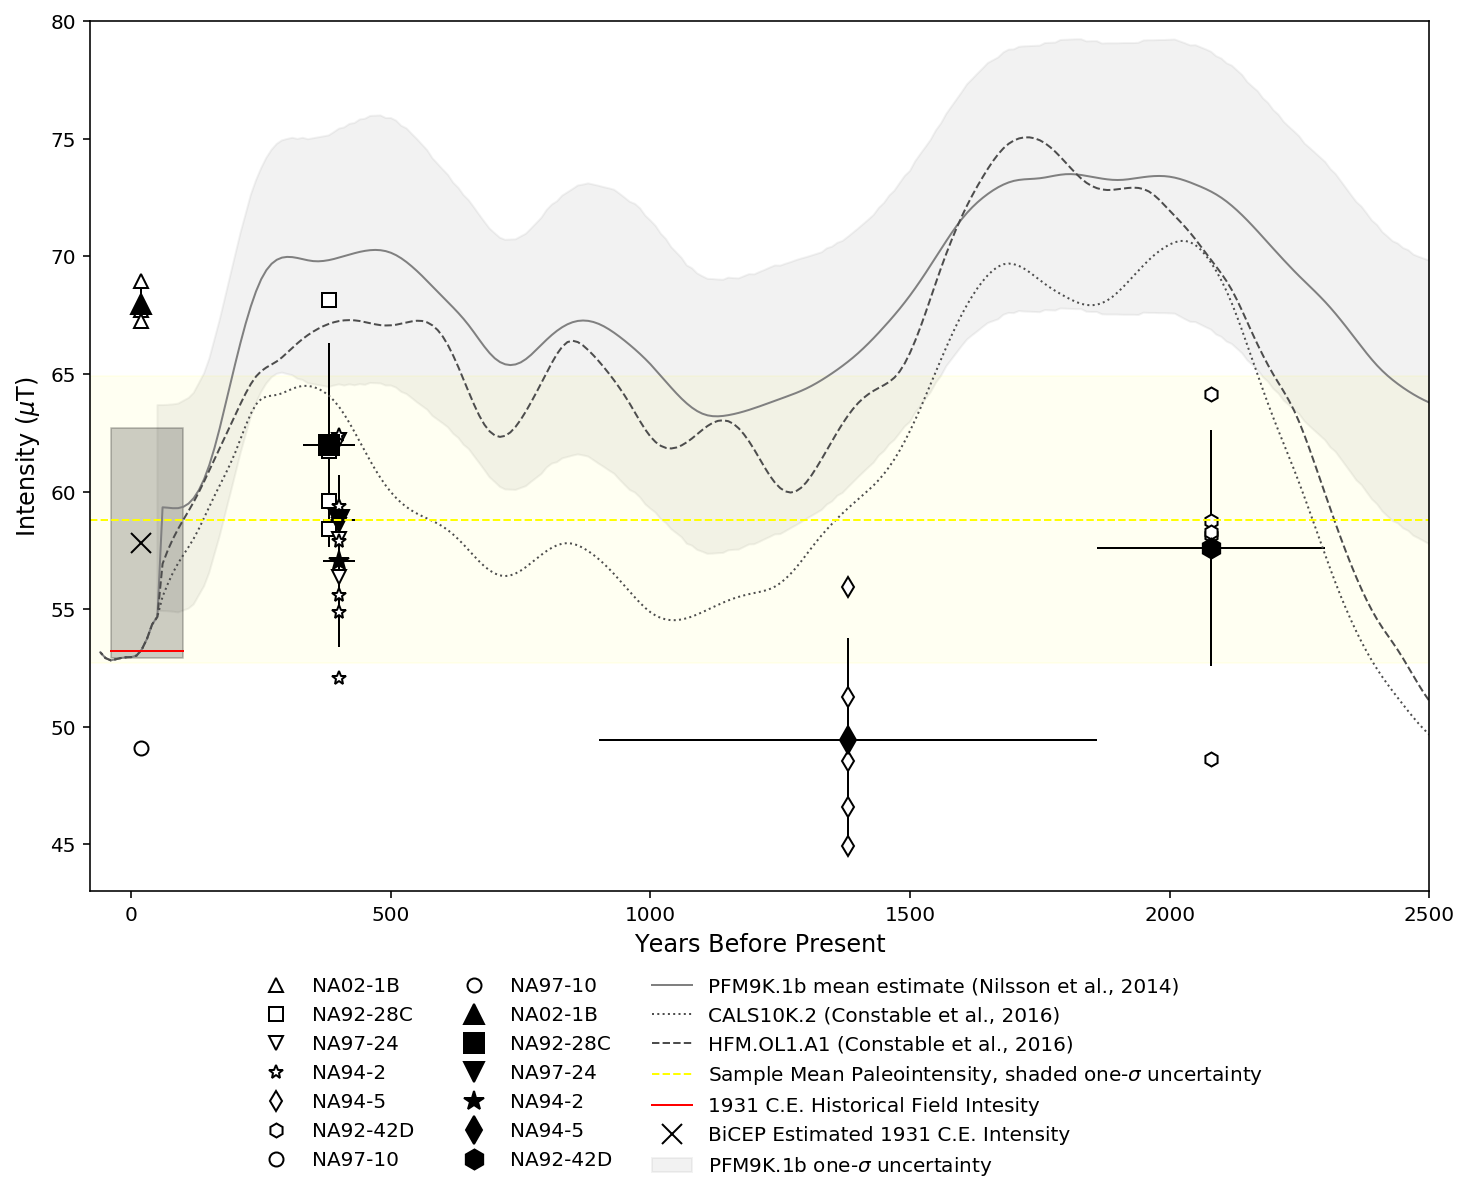

In [11]:
#plot specimen intensity data
fig, ax = plt.subplots(1, figsize = (12,8))
ax.plot(site1_dat['Avg_age'],site1_dat['specimen_int_uT'],symsample[0],label='NA02-1B',markeredgecolor='k', markersize=7)
ax.plot(site2_dat['Avg_age'],site2_dat['specimen_int_uT'],symsample[1],label='NA92-28C',markeredgecolor='k', markersize=7)
ax.plot(site3_dat['Avg_age'],site3_dat['specimen_int_uT'],symsample[2],label='NA97-24',markeredgecolor='k', markersize=7)
ax.plot(site4_dat['Avg_age'],site4_dat['specimen_int_uT'],symsample[3],label='NA94-2',markeredgecolor='k', markersize=7)
#plt.plot(site5_dat['Avg_age'],site5_dat['specimen_int_uT'],symsample[4],label='NA94-3',markeredgecolor='k')
ax.plot(site6_dat['Avg_age'],site6_dat['specimen_int_uT'],symsample[4],label='NA94-5',markeredgecolor='k', markersize=7)
ax.plot(site7_dat['Avg_age'],site7_dat['specimen_int_uT'],symsample[5],label='NA92-42D',markeredgecolor='k', markersize=7)
#NA97-10 specimens that passed CCRIT; from 1931 C.E. Flow
ax.plot(19,38.7,'wo',label='NA97-10',markeredgecolor='k',markersize=7)
ax.plot(19,49.1,'wo',label='NA97-10',markeredgecolor='k',markersize=7)

ax.plot()
#plot site intensity data with error bars
sym=0
for ref in nmsite:
    sitedat=all_data[all_data['er_site_name'].str.contains(ref)==True]
    #plt.plot(sitedat['Avg_age'],sitedat['site_int_uT'],symsite[sym],markersize=8,label='_nolegend_')
    ax.plot(sitedat['Avg_age'],sitedat['site_int_uT'],symsite[sym],markersize=10,label=nmsite[sym])
    ax.errorbar(sitedat['Avg_age'],sitedat['site_int_uT'],yerr=sitedat['site_int_sigma_uT'],xerr=sitedat['Avg_age_pm'],
                ecolor='k',label='_nolegend_')
    sym+=1

#plot global PI model curves
ax.plot(pfm9k.ages_BP,pfm9k.int_uT, '-',color='0.5',label='PFM9K.1b mean estimate (Nilsson et al., 2014)')
ax.fill_between(pfm9k_1b.year,pfm9k_1b.F_high,pfm9k_1b.F_low, color = '0.5', alpha=0.1, label = 'PFM9K.1b one-$\sigma$ uncertainty' )
ax.plot(cals10k.ages_BP,cals10k.int_uT, '-',color='0.3',ls='dotted',label='CALS10K.2 (Constable et al., 2016)')
ax.plot(hfm10k.ages_BP,hfm10k.int_uT, '-',color='0.3',ls='dashed',label='HFM.OL1.A1 (Constable et al., 2016)')
#plt.plot(cals3k.ages_BP,cals3k.int_uT, '-',color='red',ls='dotted',label='CALS3K.4')
#plt.plot(arch3k.ages_BP,arch3k.int_uT, '-',color='blue',ls='dotted',label='ARCH3k.4')
# ax.plot(pfm9k_1b.ages_BP,pfm9k_1b.F_high, '-',color='green',ls='dashed',label='PFM9K (Nilsson et al., 2014)')


#Mean aniakchak field strength, sites
AK_BFxsite=[-80,2500]
AK_BFysite=[all_data['site_int_uT'].mean(), all_data['site_int_uT'].mean()]
AK_BFy1site=[all_data['site_int_uT'].mean()-all_data['site_int_uT'].std(), 
         all_data['site_int_uT'].mean()-all_data['site_int_uT'].std()]
AK_BFy2site=[all_data['site_int_uT'].mean()+all_data['site_int_uT'].std(), 
         all_data['site_int_uT'].mean()+all_data['site_int_uT'].std()]

ax.plot(AK_BFxsite,AK_BFysite, '-',color='yellow',ls='dashed',label='Sample Mean Paleointensity, shaded one-$\sigma$ uncertainty')
ax.fill_between(AK_BFxsite, AK_BFy1site, AK_BFy2site, color = 'yellow', alpha=0.05)

### Yiming, we need to use the mean of the samples not the mean of the specimens.
### The specimens determine the sample field, which is the final result that we report
### There is a very small difference in the calculation

#Mean aniakchak field strength, specimens
#AK_BFx=[-80,2500]
#AK_BFy=[all_data2['specimen_int_uT'].mean(), all_data2['specimen_int_uT'].mean()]
#AK_BFy1=[all_data2['specimen_int_uT'].mean()-all_data2['specimen_int_uT'].std(), 
#         all_data2['specimen_int_uT'].mean()-all_data2['specimen_int_uT'].std()]
#AK_BFy2=[all_data2['specimen_int_uT'].mean()+all_data2['specimen_int_uT'].std(), 
#         all_data2['specimen_int_uT'].mean()+all_data2['specimen_int_uT'].std()]
#
#ax.plot(AK_BFx,AK_BFy, '-',color='red',ls='dashed',label='Mean Aniakchak Paleointensity')
#ax.fill_between(AK_BFx, AK_BFy1, AK_BFy2, color = 'red', alpha=0.05)


#1931 CE Historical Field Strength
BF31x=[-40,100]
BF31y=[53.2, 53.2]
plt.plot(BF31x,BF31y, '-',color='red',ls='solid',label='1931 C.E. Historical Field Intesity')

#BiCEP field estimate
ax.plot(19,57.8, 'kx',label='BiCEP Estimated 1931 C.E. Intensity',markersize=10)

#BiCEP uncertainty 2-sigma
Bicepx=[-40,100]
Bicepy_high=[67.0, 67.0]
Bicepy_low=[47.4, 47.4]
#ax.fill_between(Bicepx, Bicepy_high, Bicepy_low, color = 'black', alpha=0.05)

#BiCEP uncertainty 1-sigma
Bicepx=[-40,100]
Bicepy_high=[62.7, 62.7]
Bicepy_low=[52.9, 52.9]
ax.fill_between(Bicepx, Bicepy_high, Bicepy_low, color = 'black', alpha=0.2)

plt.axis([-80,2500,43,80])
plt.xlabel('Years Before Present')
plt.ylabel('Intensity ($\mu$T)')
plt.legend(numpoints=1,bbox_to_anchor=(0.5, -0.35),loc=8,ncol=3)
#plt.savefig('Figure/VADM_comparison_revision.pdf',bbox_inches='tight')
plt.show()

# Aniakchak sites geochemistry

In [22]:
# Load geochemistry file
Geochem_data = pd.ExcelFile('../Data/Geochem.xlsx', engine='openpyxl', )
Geochem_sheet = pd.read_excel(Geochem_data, 'Geochem')
All_1931_sheet = pd.read_excel(Geochem_data, '1931')
All_hc_sheet = pd.read_excel(Geochem_data, 'Half Cone')
All_Qtc_sheet = pd.read_excel(Geochem_data, 'Qtc')
All_Qd_sheet = pd.read_excel(Geochem_data, 'Qd')
All_Qvm_sheet = pd.read_excel(Geochem_data, 'Qvm')
Geochem_sheet

,Unnamed: 0,sample ID,N Latitude (NAD83),W Longitude (NAD83),Map unit,"Pyroclastic, Lava, or Uncertain",Location,Description,SiO2_recalculated,TiO2_recalculated,...,Y_icpms,Hf_icpms,Ta_icpms,U_icpms,Pb_icpms,Rb_icpms,Cs_icpms,Sr_icpms,Sc_icpms,Zr_icpms
0,216,NA92-42D,56.902600,158.224300,Qd,L,"1931 Main Crater, west wall","pre-Half Cone, dense, gray, sparsely porphyrit...",68.140000,0.709000,...,38.606599,6.078799,0.823830,2.600693,9.423297,62.660681,3.048975,nd,nd,223.815998
1,282,NA02-10G,56.901467,158.224367,Qd,L,1931 Main Crater west wall,"dense, gray lava flow with platy jointing high...",67.974329,0.712083,...,38.876348,6.233862,0.909152,2.517599,10.604423,62.198315,2.927187,264.339111,13.001015,220.082936
2,282,NA02-10F,56.901467,158.224367,Qtc?,NaN,1931 Main Crater west wall,black agglutinate half cone? No real break bet...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,261,NA94-5,56.895100,158.088200,Qtc?,L,Lowest flow terrace below big maar,older lava flow near The Gates; possible Windy...,53.582892,1.196638,...,25.382893,2.769087,0.382728,1.015921,5.052330,24.091705,1.132053,443.811496,nd,99.405479
4,260,NA94-2,56.879300,158.135800,Qvm,P,"New Cone rim, southeast flank of Vent Mountain","dark brown, scoriaceous, porphyritic pumice",65.217610,0.926512,...,41.048345,6.094489,0.872842,2.433978,9.750026,57.092188,2.673505,295.360407,nd,213.945839
5,248,NA93-100A,56.893900,158.129400,Qvm,L,East base of Vent Mountain,"Vent Mountain lava younger than tuff cones, at...",63.900000,0.962000,...,40.464530,5.545530,0.817204,1.811386,11.099750,56.337285,2.519865,nd,nd,201.910981
6,274,NA97-24,56.880000,158.134000,Qvm,U,East rim New Cone crater,New Cone agglutinate,62.191441,1.059343,...,36.317294,4.849826,0.693430,1.993073,7.857037,46.247205,2.125373,322.533855,19.652242,171.491012
7,275,NA97-25,56.885900,158.124800,Qvm,L,Alluvial flat east of Vent Mountain,"Vent Mountain lava, possibly related to New Cone",62.085280,1.059479,...,37.246753,4.928151,0.720981,1.983990,7.788487,46.852318,2.152538,338.600434,20.55881,174.749026
8,203,NA92-28C,56.907600,158.201900,Qht,P,1931 Main Crater wall,Half Cone agglutinate,61.696528,1.058812,...,32.561314,3.970738,0.565232,1.539293,6.030000,38.970000,1.730000,nd,nd,nd
9,223,NA92-59,56.895000,158.168600,Qht,P,North base Vent Mountain,Half Cone agglutinate,59.490000,1.134000,...,29.489008,3.889652,0.525135,1.523897,3.067690,35.195851,1.677912,nd,nd,133.66812


In [14]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

### All sites

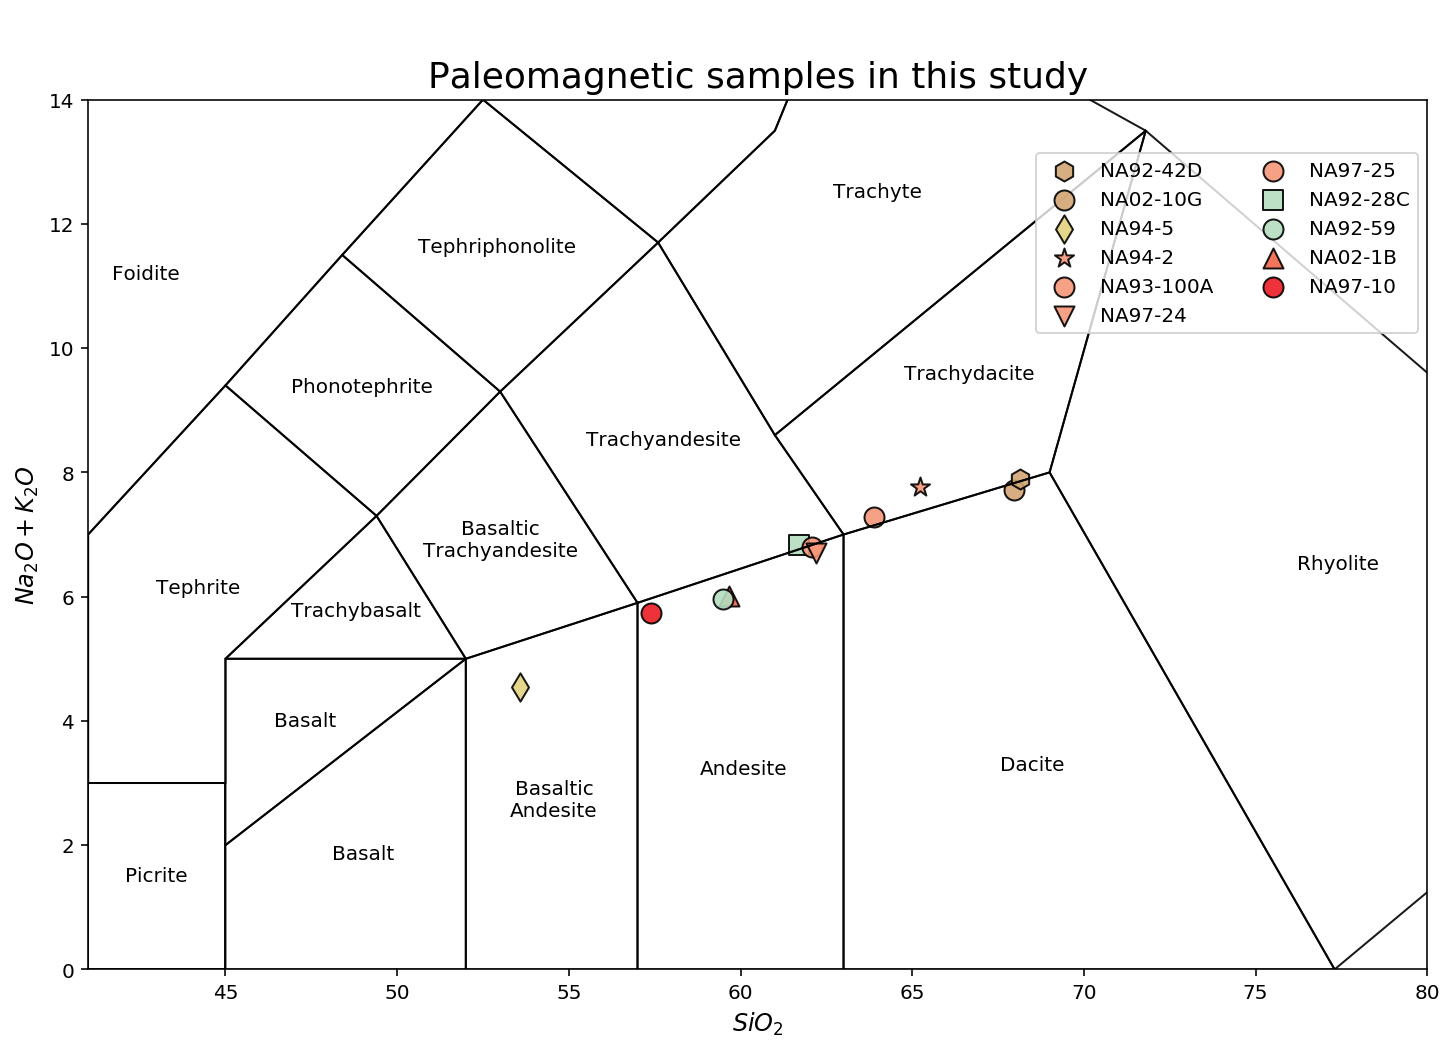

In [23]:
# no geochem data for site NA02-10F so drop it here
Geochem_sheet = Geochem_sheet.drop(Geochem_sheet[Geochem_sheet['sample ID'] == 'NA02-10F'].index)
Geochem_sheet = Geochem_sheet.drop(Geochem_sheet[Geochem_sheet['sample ID'] == 'NA02-11F'].index)

unit_list = ['Qd', 'Qtc?', 'Qvm', 'Qht', 'Qhc?', 'Q31t?','Q31l']
color_list = ['#D2A574', '#E3D280', '#F69679', '#B4DDC0', '#72A481', '#F26649', '#ED1C24']
marker_list = ['h', 'o', 'd', '*', 'o', 'v', 'o', 's', 'o', '^', 'o']

Geochem_sheet["TotalAlkali"] = Geochem_sheet["K2O_recalculated"] + Geochem_sheet["Na2O_recalculated"]
cm = TAS()
fig, ax = plt.subplots(1, figsize = (12,8))

for i in range(len(Geochem_sheet["SiO2_recalculated"])):
    
    ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[i], Geochem_sheet["TotalAlkali"].tolist()[i], 100,
               c= color_list[unit_list.index(Geochem_sheet['Map unit'].tolist()[i])], marker = marker_list[i],
               edgecolor = 'black', alpha=0.9, zorder = -i, label = Geochem_sheet['sample ID'].tolist()[i])
cm.add_to_axes(ax, alpha=0.9, zorder=-1, labels='volcanic')
plt.xlim(41,80)
plt.ylim(0,14)
plt.title('Paleomagnetic samples in this study', fontsize=18)
plt.legend(ncol=2, bbox_to_anchor=(0.7,0.95), frameon=True, facecolor='white')
# plt.legend(bbox_to_anchor=(0.7, -0.1), ncol=2)
# plt.savefig('Figure/TAS_all_sites.pdf',bbox_inches='tight')
plt.show()

### All Qd unit

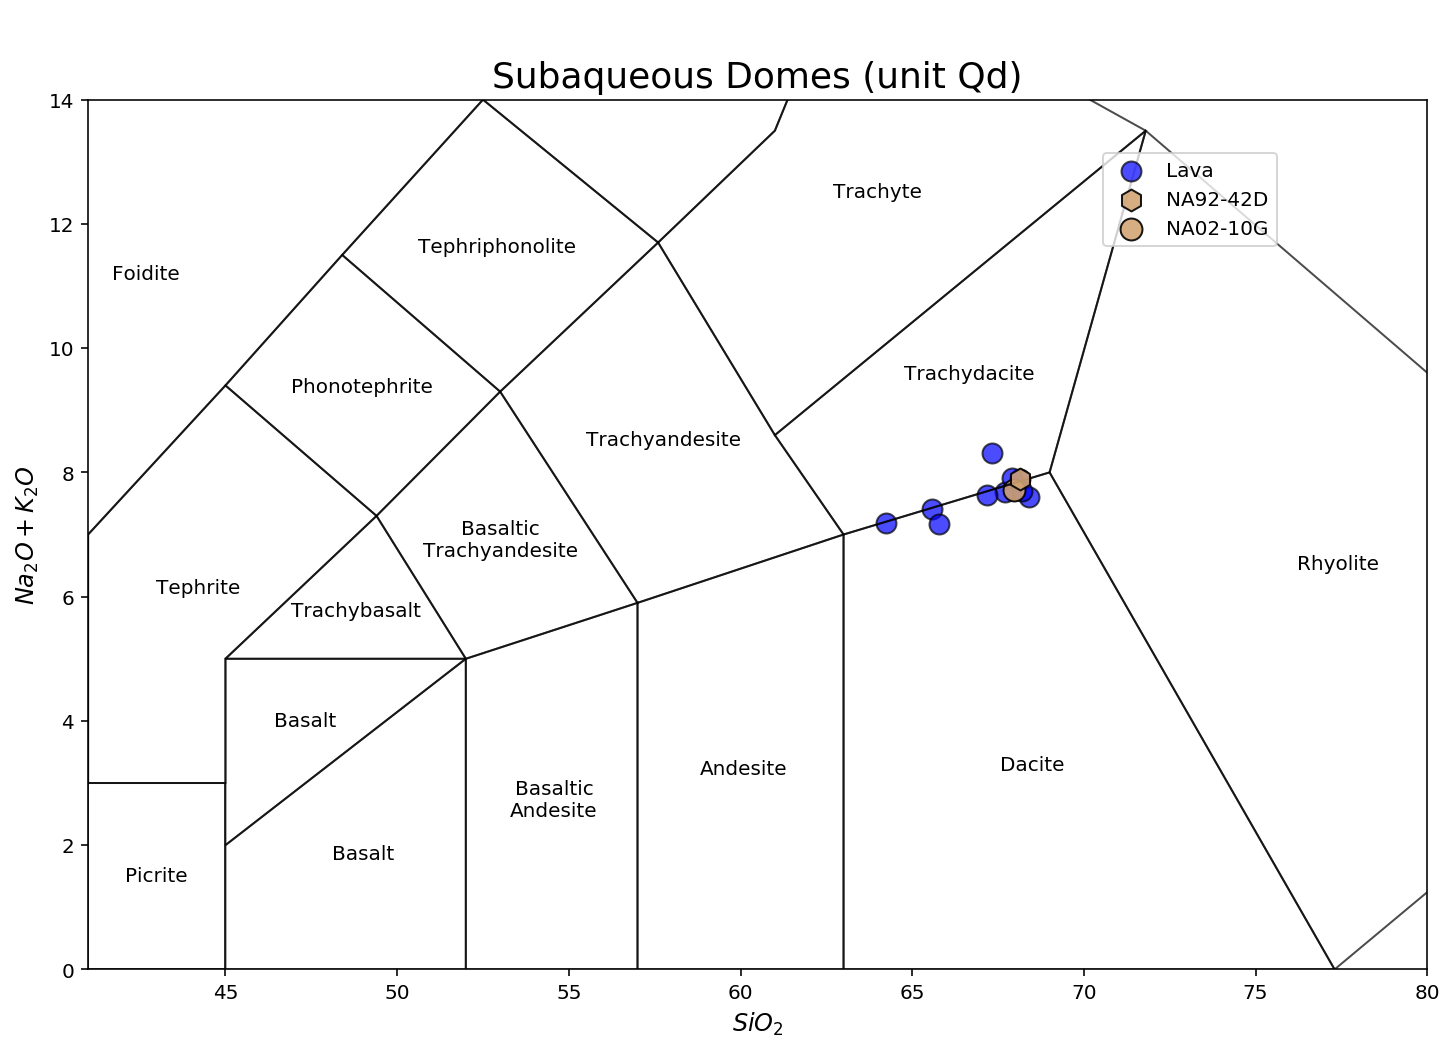

In [24]:
# plotting all Qd eruption geochemistry data and see if this can explain the outlier NA94-5

All_Qd_sheet["TotalAlkali"] = All_Qd_sheet["K2O_recalculated"] + All_Qd_sheet["Na2O_recalculated"]
cm = TAS()
fig, ax = plt.subplots(1, figsize = (12,8))

All_Qd_sheet['color'] = None

for i in range(len(All_Qd_sheet["SiO2_recalculated"])):
    if All_Qd_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'L':
        All_Qd_sheet['color'][i] = 'blue'
    elif All_Qd_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'P':
        All_Qd_sheet['color'][i] = 'purple'
    else:
        All_Qd_sheet['color'][i] = 'grey'
All_Qd_sheet_lava = All_Qd_sheet[All_Qd_sheet['color'] == 'blue']
All_Qd_sheet_pyro = All_Qd_sheet[All_Qd_sheet['color'] == 'purple']
All_Qd_sheet_unknown = All_Qd_sheet[All_Qd_sheet['color'] == 'grey']
ax.scatter(All_Qd_sheet_lava["SiO2_recalculated"].tolist(), All_Qd_sheet_lava["TotalAlkali"].tolist(), 100,
               c= 'blue', edgecolor = 'black', alpha=0.7, label = 'Lava', marker = 'o')
# ax.scatter(All_Qd_sheet_pyro["SiO2_recalculated"].tolist(), All_Qd_sheet_pyro["TotalAlkali"].tolist(), 100,
#                c= 'purple', edgecolor = 'black', alpha=0.7, label ='Pyroclastic flow', marker = 'o')
# ax.scatter(All_Qd_sheet_unknown["SiO2_recalculated"].tolist(), All_Qd_sheet_unknown["TotalAlkali"].tolist(), 100,
#                c= 'grey', edgecolor = 'black', alpha=0.7, label = 'Unkown', marker = 'o')

ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[0], Geochem_sheet["TotalAlkali"].tolist()[0], 120,
               c= color_list[unit_list.index(Geochem_sheet['Map unit'].tolist()[0])], edgecolor = 'black', 
           alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[0], marker = 'h', zorder = 100)
ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[1], Geochem_sheet["TotalAlkali"].tolist()[1], 120,
               c= color_list[unit_list.index(Geochem_sheet['Map unit'].tolist()[1])], edgecolor = 'black', 
           alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[1], marker = 'o')

cm.add_to_axes(ax, alpha=0.7, zorder=-1, labels='volcanic')
plt.title('Subaqueous Domes (unit Qd)', fontsize=18)
Lava = mpatches.Circle((0.5,0.5), radius = 1.5,  edgecolor = 'black', facecolor='blue', label='Lava')
Tephra = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='purple', label = 'Pyroclastic flow' )
Unknown = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='grey', label='Unknown')
Qd = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='#D2A574', label='NA92-42D, NA02-10G')

# ax.legend(handles = [Lava, Tephra, Unknown, Qd], bbox_to_anchor=(0.7,0.95),
#           frameon=True, facecolor='white', handler_map={mpatches.Circle: HandlerEllipse()})
plt.legend(bbox_to_anchor=(0.75,0.95), frameon=True, facecolor='white')
plt.xlim(41,80)
plt.ylim(0,14)
# plt.savefig('Figure/TAS_Qd_sites.pdf',bbox_inches='tight')
plt.show()

### All Qtc unit

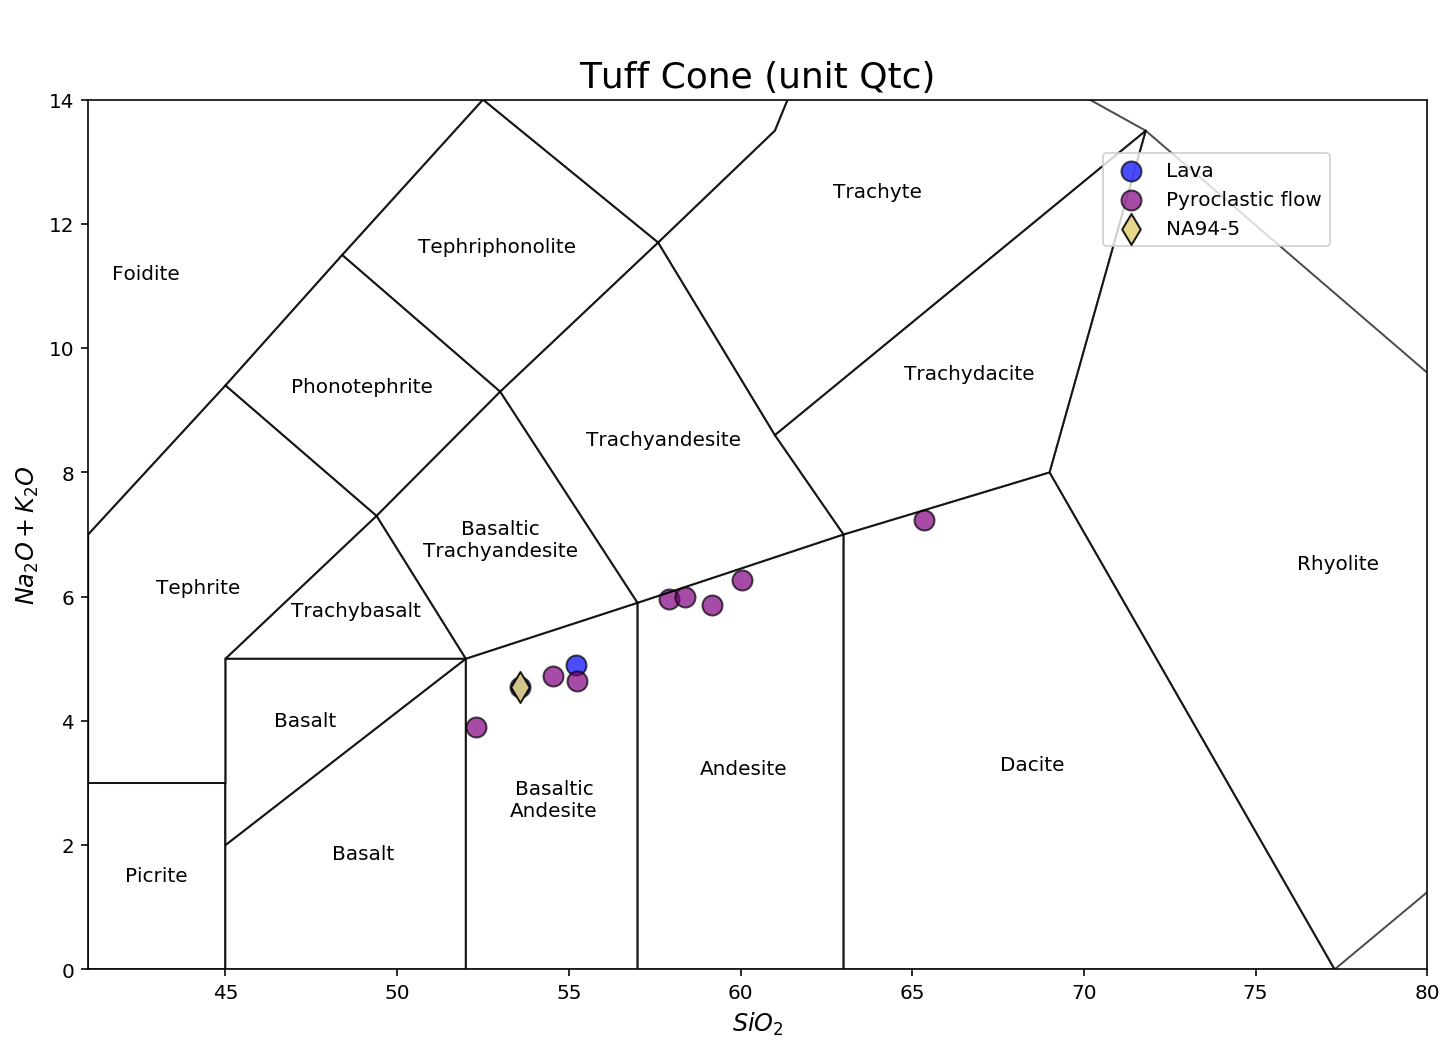

In [25]:
All_Qtc_sheet["TotalAlkali"] = All_Qtc_sheet["K2O_recalculated"] + All_Qtc_sheet["Na2O_recalculated"]
cm = TAS()
fig, ax = plt.subplots(1, figsize = (12,8))


All_Qtc_sheet['color'] = None
for i in range(len(All_Qtc_sheet["SiO2_recalculated"])):
    if All_Qtc_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'L':
        All_Qtc_sheet['color'][i] = 'blue'
    elif All_Qtc_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'P':
        All_Qtc_sheet['color'][i] = 'purple'
    else:
        All_Qtc_sheet['color'][i] = 'grey'
        
All_Qtc_sheet_lava = All_Qtc_sheet[All_Qtc_sheet['color'] == 'blue']
All_Qtc_sheet_pyro = All_Qtc_sheet[All_Qtc_sheet['color'] == 'purple']
All_Qtc_sheet_unknown = All_Qtc_sheet[All_Qtc_sheet['color'] == 'grey']
ax.scatter(All_Qtc_sheet_lava["SiO2_recalculated"].tolist(), All_Qtc_sheet_lava["TotalAlkali"].tolist(), 100,
               c= 'blue', edgecolor = 'black', alpha=0.7, label = 'Lava', marker = 'o')
ax.scatter(All_Qtc_sheet_pyro["SiO2_recalculated"].tolist(), All_Qtc_sheet_pyro["TotalAlkali"].tolist(), 100,
               c= 'purple', edgecolor = 'black', alpha=0.7, label ='Pyroclastic flow', marker = 'o')
# ax.scatter(All_Qtc_sheet_unknown["SiO2_recalculated"].tolist(), All_Qtc_sheet_unknown["TotalAlkali"].tolist(), 100,
#                c= 'grey', edgecolor = 'black', alpha=0.7, label = 'Unkown', marker = 'o')

    
ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[2], Geochem_sheet["TotalAlkali"].tolist()[2], 120,
               c= color_list[unit_list.index(Geochem_sheet['Map unit'].tolist()[2])], 
           edgecolor = 'black', alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[2], marker = 'd')


cm.add_to_axes(ax, alpha=0.7, zorder=-1, labels='volcanic')
plt.title('Tuff Cone (unit Qtc)', fontsize=18)
Lava = mpatches.Circle((0.5,0.5), radius = 1.5,  edgecolor = 'black', facecolor='blue', label='Lava')
Tephra = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='purple', label = 'Pyroclastic flow' )
Unknown = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='grey', label='Unknown')
Qtc = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='#E3D280', label='NA94-5')

ax.legend(handles = [Lava, Tephra, Unknown, Qtc], handler_map={mpatches.Circle: HandlerEllipse()}, 
          bbox_to_anchor=(0.7,0.95),
          frameon=True, facecolor='white')
plt.legend(bbox_to_anchor=(0.75,0.95), frameon=True, facecolor='white')
plt.xlim(41,80)
plt.ylim(0,14)
# plt.savefig('Figure/TAS_Qtc_sites.pdf',bbox_inches='tight')
plt.show()

### All Qvm unit

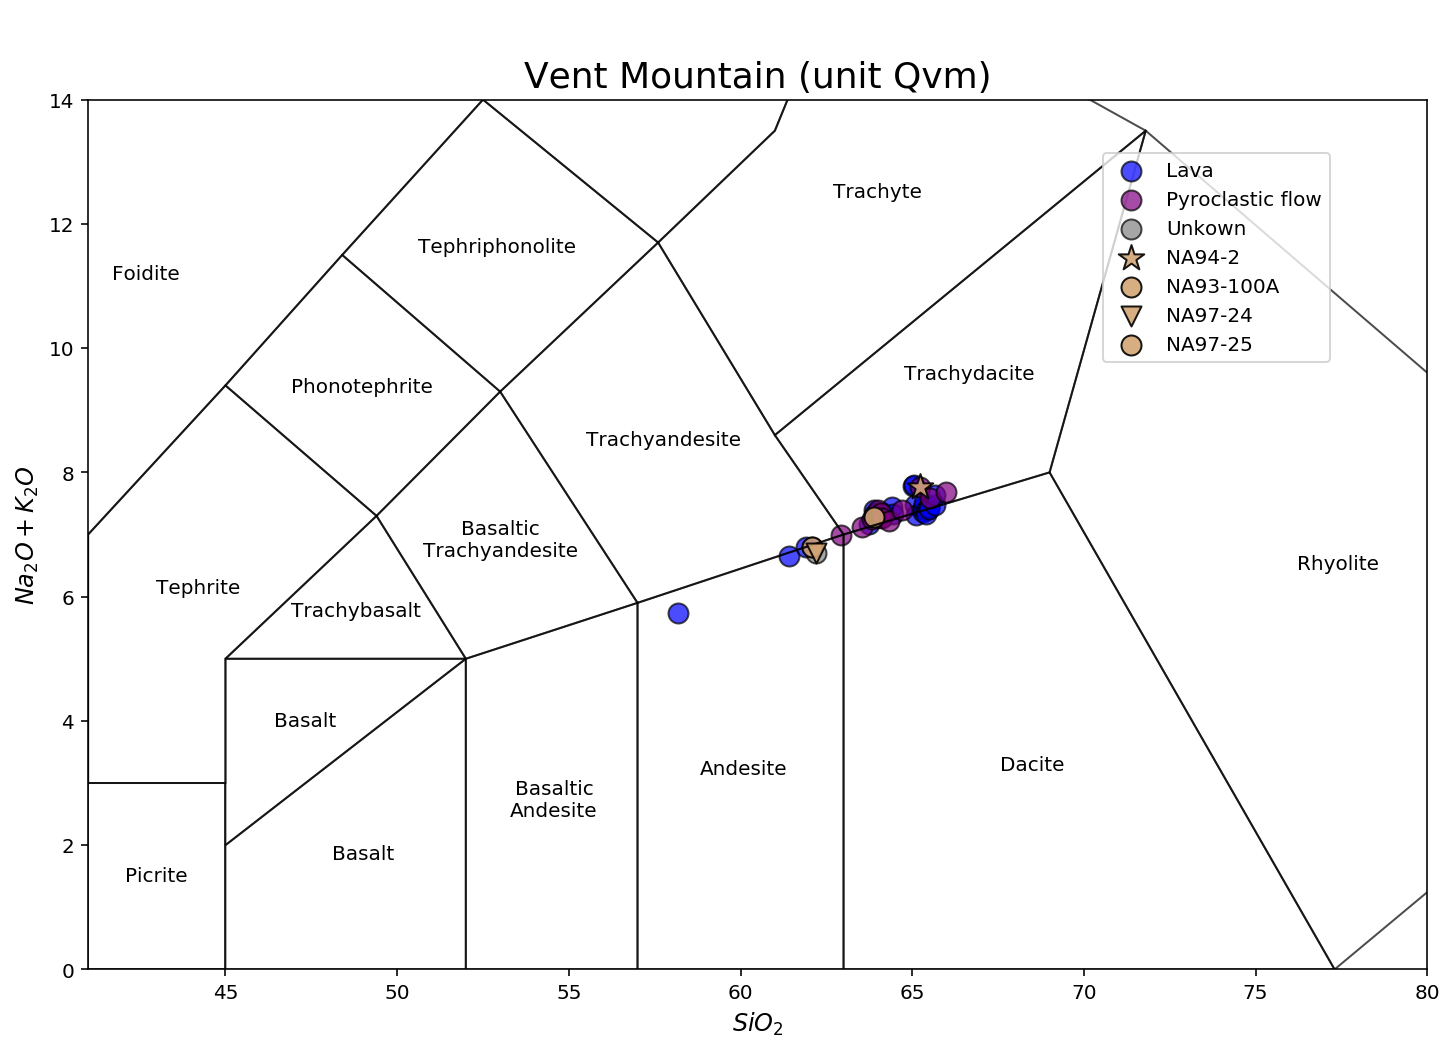

In [26]:
# plotting all Qvm eruption geochemistry data and see if this can explain the outlier NA94-5

All_Qvm_sheet["TotalAlkali"] = All_Qvm_sheet["K2O_recalculated"] + All_Qvm_sheet["Na2O_recalculated"]
cm = TAS()
fig, ax = plt.subplots(1, figsize = (12,8))

All_Qvm_sheet['color'] = None
for i in range(len(All_Qvm_sheet["SiO2_recalculated"])):
    if All_Qvm_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'L':
        All_Qvm_sheet['color'][i] = 'blue'
    elif All_Qvm_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'P':
        All_Qvm_sheet['color'][i] = 'purple'
    else:
        All_Qvm_sheet['color'][i] = 'grey'
        
All_Qvm_sheet_lava = All_Qvm_sheet[All_Qvm_sheet['color'] == 'blue']
All_Qvm_sheet_pyro = All_Qvm_sheet[All_Qvm_sheet['color'] == 'purple']
All_Qvm_sheet_unknown = All_Qvm_sheet[All_Qvm_sheet['color'] == 'grey']

ax.scatter(All_Qvm_sheet_lava["SiO2_recalculated"].tolist(), All_Qvm_sheet_lava["TotalAlkali"].tolist(), 100,
               c= 'blue', edgecolor = 'black', alpha=0.7, label = 'Lava', marker = 'o')
ax.scatter(All_Qvm_sheet_pyro["SiO2_recalculated"].tolist(), All_Qvm_sheet_pyro["TotalAlkali"].tolist(), 100,
               c= 'purple', edgecolor = 'black', alpha=0.7, label ='Pyroclastic flow', marker = 'o')
ax.scatter(All_Qvm_sheet_unknown["SiO2_recalculated"].tolist(), All_Qvm_sheet_unknown["TotalAlkali"].tolist(), 100,
               c= 'grey', edgecolor = 'black', alpha=0.7, label = 'Unkown', marker = 'o')

ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[3], Geochem_sheet["TotalAlkali"].tolist()[3], 180,
               c= '#D2A574', 
           edgecolor = 'black', alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[3], marker = '*')
ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[4], Geochem_sheet["TotalAlkali"].tolist()[4], 100,
               c= '#D2A574', 
           edgecolor = 'black', alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[4], marker = 'o')
ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[5], Geochem_sheet["TotalAlkali"].tolist()[5], 100,
               c= '#D2A574', 
           edgecolor = 'black', alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[5], marker = 'v', zorder = 100)
ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[6], Geochem_sheet["TotalAlkali"].tolist()[6], 100,
               c= '#D2A574', 
           edgecolor = 'black', alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[6], marker = 'o')

cm.add_to_axes(ax, alpha=0.7, zorder=-1, labels='volcanic')
plt.title('Vent Mountain (unit Qvm)', fontsize=18)
Lava = mpatches.Circle((0.5,0.5), radius = 1.5,  edgecolor = 'black', facecolor='blue', label='Lava')
Tephra = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='purple', label = 'Pyroclastic flow' )
Unknown = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='grey', label='Unknown')
# Qvm = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='#D2A574', label='NA94-2, NA93-100A, \nNA97-24, NA97-25')

plt.legend(bbox_to_anchor=(0.75,0.95), frameon=True, facecolor='white')
plt.xlim(41,80)
plt.ylim(0,14)
# plt.savefig('Figure/TAS_Qvm_sites.pdf',bbox_inches='tight')
plt.show()

### All Half Cone unit

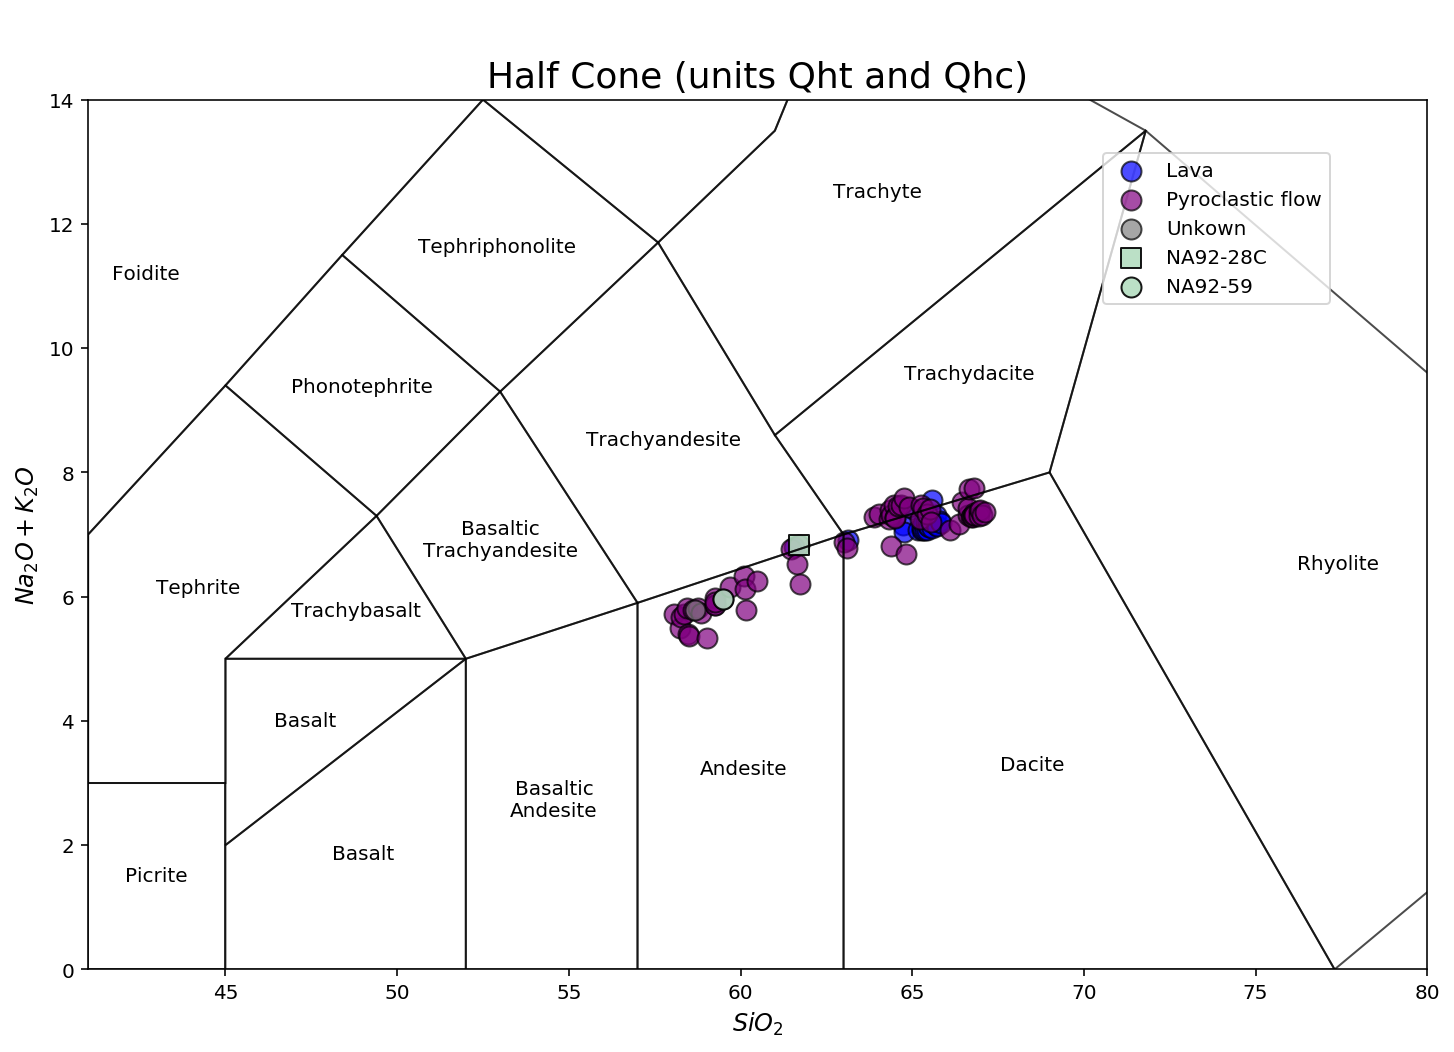

In [27]:
# plotting all Qht, Qhc eruption geochemistry data

All_hc_sheet["TotalAlkali"] = All_hc_sheet["K2O_recalculated"] + All_hc_sheet["Na2O_recalculated"]
cm = TAS()
fig, ax = plt.subplots(1, figsize = (12,8))

All_hc_sheet['color'] = None
for i in range(len(All_hc_sheet["SiO2_recalculated"])):
    if All_hc_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'L':
        All_hc_sheet['color'][i] = 'blue'
    elif All_hc_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'P':
        All_hc_sheet['color'][i] = 'purple'
    else:
        All_hc_sheet['color'][i] = 'grey'
        
All_hc_sheet_lava = All_hc_sheet[All_hc_sheet['color'] == 'blue']
All_hc_sheet_pyro = All_hc_sheet[All_hc_sheet['color'] == 'purple']
All_hc_sheet_unknown = All_hc_sheet[All_hc_sheet['color'] == 'grey']

ax.scatter(All_hc_sheet_lava["SiO2_recalculated"].tolist(), All_hc_sheet_lava["TotalAlkali"].tolist(), 100,
               c= 'blue', edgecolor = 'black', alpha=0.7, label = 'Lava', marker = 'o')
ax.scatter(All_hc_sheet_pyro["SiO2_recalculated"].tolist(), All_hc_sheet_pyro["TotalAlkali"].tolist(), 100,
               c= 'purple', edgecolor = 'black', alpha=0.7, label ='Pyroclastic flow', marker = 'o')
ax.scatter(All_hc_sheet_unknown["SiO2_recalculated"].tolist(), All_hc_sheet_unknown["TotalAlkali"].tolist(), 100,
               c= 'grey', edgecolor = 'black', alpha=0.7, label = 'Unkown', marker = 'o')

ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[7], Geochem_sheet["TotalAlkali"].tolist()[7], 100,
               c= color_list[unit_list.index(Geochem_sheet['Map unit'].tolist()[7])], 
           edgecolor = 'black', alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[7], marker = 's')
ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[8], Geochem_sheet["TotalAlkali"].tolist()[8], 100,
               c= color_list[unit_list.index(Geochem_sheet['Map unit'].tolist()[8])], 
           edgecolor = 'black', alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[8], marker = 'o')

cm.add_to_axes(ax, alpha=0.7, zorder=-1, labels='volcanic')

plt.title('Half Cone (units Qht and Qhc)', fontsize=18)
Lava = mpatches.Circle((0.5,0.5), radius = 1.5,  edgecolor = 'black', facecolor='blue', label='Lava')
Tephra = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='purple', label = 'Pyroclastic flow' )
Unknown = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='grey', label='Unknown')
Qht = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='#B4DDC0', label='NA92-28C, NA92-59')
Qhc = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='#72A481', label='NA02-11F')

plt.legend(bbox_to_anchor=(0.75,0.95), frameon=True, facecolor='white')
plt.xlim(41,80)
plt.ylim(0,14)
# plt.savefig('Figure/TAS_all_hc_sites.pdf',bbox_inches='tight')
plt.show()

### All 1931 unit

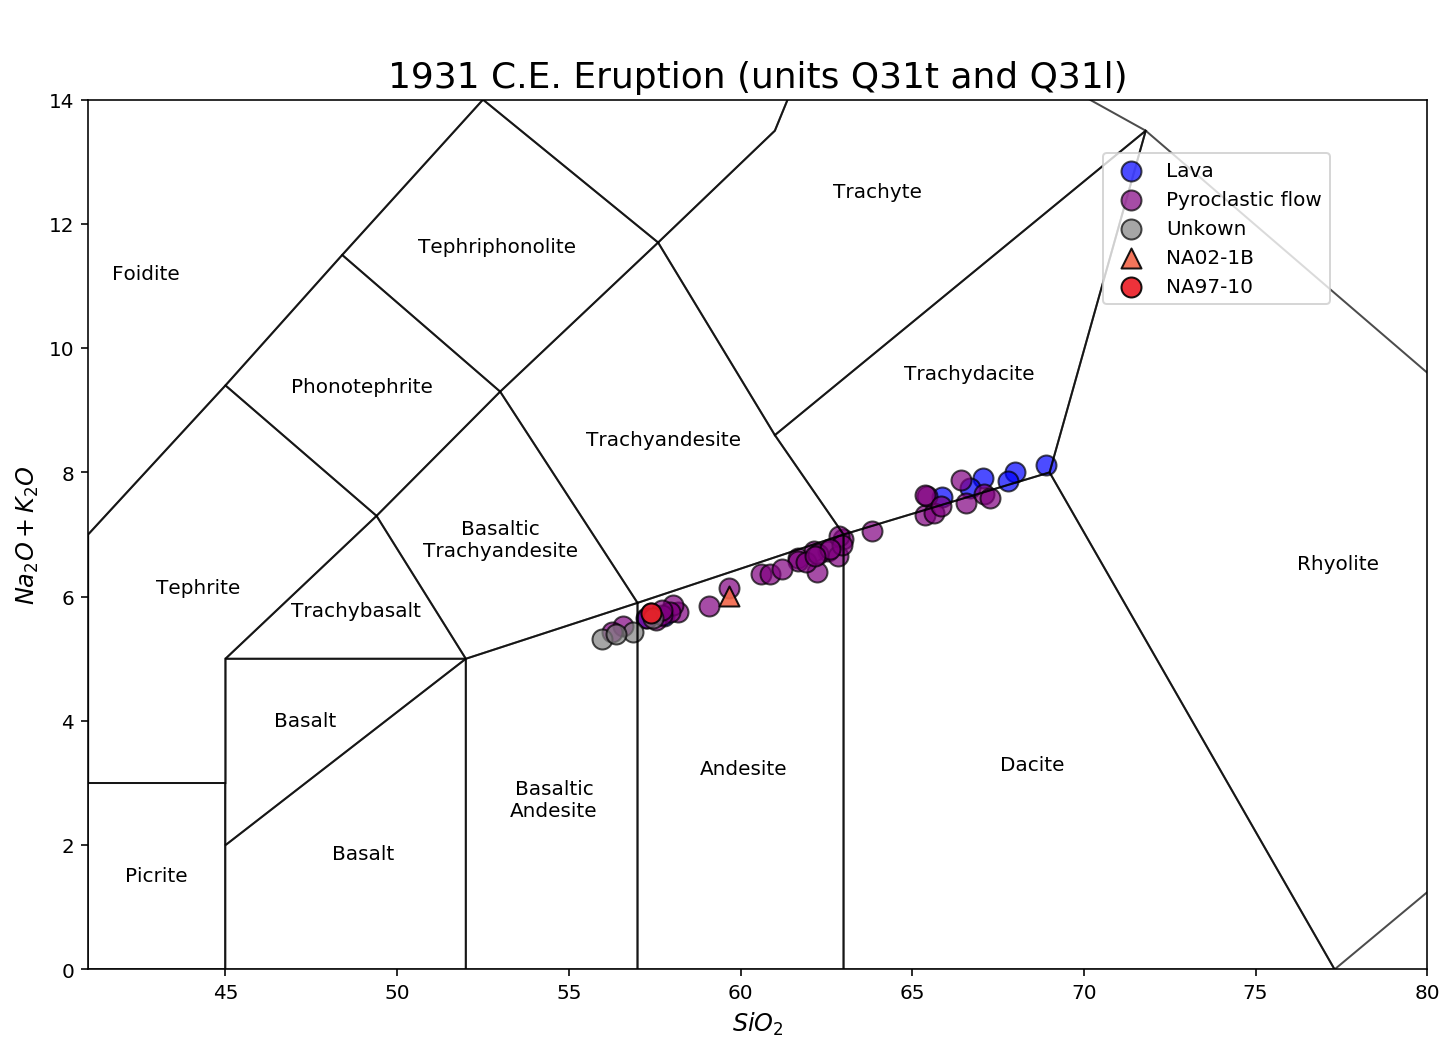

In [30]:
# plotting all 1931 eruption geochemistry data and see if this can explain the outlier NA94-5

All_1931_sheet["TotalAlkali"] = All_1931_sheet["K2O_recalculated"] + All_1931_sheet["Na2O_recalculated"]
cm = TAS()
fig, ax = plt.subplots(1, figsize = (12,8))

All_1931_sheet['color'] = None
for i in range(len(All_1931_sheet["SiO2_recalculated"])):
    if All_1931_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'L':
        All_1931_sheet['color'][i] = 'blue'
    elif All_1931_sheet['Pyroclastic, Lava, or Uncertain'].tolist()[i] == 'P':
        All_1931_sheet['color'][i] = 'purple'
    else:
        All_1931_sheet['color'][i] = 'grey'
        
All_1931_sheet_lava = All_1931_sheet[All_1931_sheet['color'] == 'blue']
All_1931_sheet_pyro = All_1931_sheet[All_1931_sheet['color'] == 'purple']
All_1931_sheet_unknown = All_1931_sheet[All_1931_sheet['color'] == 'grey']

ax.scatter(All_1931_sheet_lava["SiO2_recalculated"].tolist(), All_1931_sheet_lava["TotalAlkali"].tolist(), 100,
               c= 'blue', edgecolor = 'black', alpha=0.7, label = 'Lava', marker = 'o')
ax.scatter(All_1931_sheet_pyro["SiO2_recalculated"].tolist(), All_1931_sheet_pyro["TotalAlkali"].tolist(), 100,
               c= 'purple', edgecolor = 'black', alpha=0.7, label ='Pyroclastic flow', marker = 'o')
ax.scatter(All_1931_sheet_unknown["SiO2_recalculated"].tolist(), All_1931_sheet_unknown["TotalAlkali"].tolist(), 100,
               c= 'grey', edgecolor = 'black', alpha=0.7, label = 'Unkown', marker = 'o')

ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[9], Geochem_sheet["TotalAlkali"].tolist()[9], 100,
               c= color_list[unit_list.index(Geochem_sheet['Map unit'].tolist()[9])], 
           edgecolor = 'black', alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[9], marker = '^')
ax.scatter(Geochem_sheet["SiO2_recalculated"].tolist()[10], Geochem_sheet["TotalAlkali"].tolist()[10], 100,
               c= color_list[unit_list.index(Geochem_sheet['Map unit'].tolist()[10])], 
           edgecolor = 'black', alpha=0.9, label = Geochem_sheet['sample ID'].tolist()[10], marker = 'o')

cm.add_to_axes(ax, alpha=0.7, zorder=-1, labels='volcanic')
plt.title('1931 C.E. Eruption (units Q31t and Q31l)', fontsize=18)
Lava = mpatches.Circle((0.5,0.5), radius = 1.5,  edgecolor = 'black', facecolor='blue', label='Lava')
Tephra = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='purple', label = 'Pyroclastic flow' )
Unknown = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='grey', label='Unknown')
Q31 = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='#ED1C24', label='NA97-10')
Q3t = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='#F26649', label='NA02-1B')

plt.legend(bbox_to_anchor=(0.75,0.95), frameon=True, facecolor='white')
plt.xlim(41,80)
plt.ylim(0,14)
# plt.savefig('Figure/TAS_1931_sites.pdf',bbox_inches='tight')
plt.show()